Original Data Head:
   Temperature  Humidity  Pm2.5  PM10   CO2       AQI
0         29.8      59.1    5.2  17.9  1.72  Moderate
1         28.3      75.6    2.3  12.2  1.64  Moderate
2         23.1      74.7   26.7  33.8  1.63  Moderate
3         27.1      39.1    6.1   6.3  1.15      Good
4         26.5      70.7    6.9  16.0  1.01      Good

Mean Squared Error: 3678.7679526950546
R-squared: 0.7078167607862378


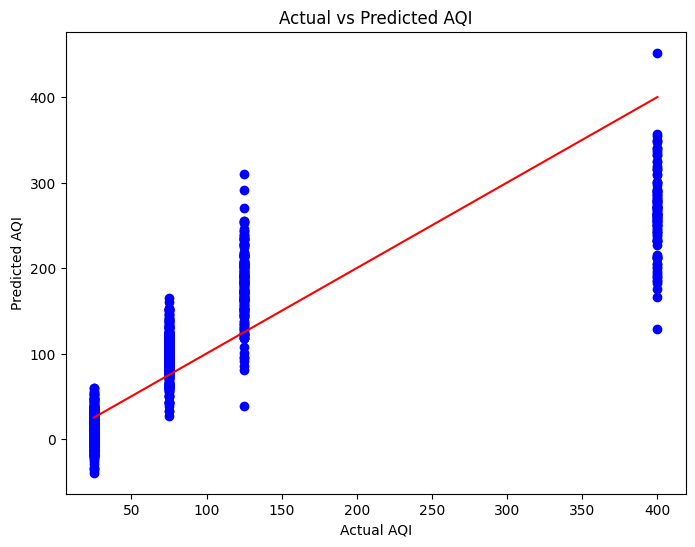

In [ ]:
#####5000 data linear regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# specify the file path with the updated filename
file_path = r'C:\Users\user\Desktop\dataset\updated_pollution_dataset.csv'
df = pd.read_csv(file_path)


# Previewing the data
print("Original Data Head:")
print(df.head())

# Convert AQI categories to numerical values
def convert_aqi_to_numerical(aqi_category):
    if aqi_category == 'Good':
        return 25  # Midpoint between 0 and 50
    elif aqi_category == 'Moderate':
        return 75  # Midpoint between 51 and 100
    elif aqi_category == 'Poor':
        return 125  # Midpoint between 101 and 150
    elif aqi_category == 'Unhealthy for Sensitive Groups':
        return 175  # Midpoint between 151 and 200
    elif aqi_category == 'Unhealthy':
        return 250  # Midpoint between 201 and 300
    elif aqi_category == 'Hazardous':
        return 400  # Midpoint between 301 and 500
    return None  # Handle any missing categories

# Apply the conversion function to the 'AQI' column
df['AQI'] = df['AQI'].apply(convert_aqi_to_numerical)

# Features and target variable
X = df[['Temperature', 'Humidity', 'CO2', 'Pm2.5', 'PM10']]  # Use these features
Y = df['AQI']  # Target variable is AQI (now numerical)

# Splitting the data into training and testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
##vaalidation data 0.2

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

# Predicting on the test data
Y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualizing the predictions
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()


Original Data Head:
   Temperature  Humidity  Pm2.5  PM10   CO2       AQI
0         29.8      59.1    5.2  17.9  1.72  Moderate
1         28.3      75.6    2.3  12.2  1.64  Moderate
2         23.1      74.7   26.7  33.8  1.63  Moderate
3         27.1      39.1    6.1   6.3  1.15      Good
4         26.5      70.7    6.9  16.0  1.01      Good

Mean Squared Error: 3365.7
R-squared: 0.73268193567324


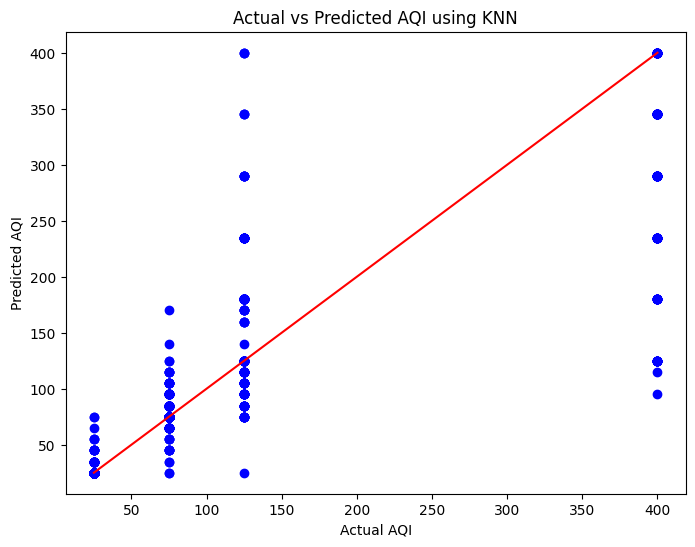

In [ ]:
##using KNN model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Correct file path with the updated filename
file_path = r'C:\Users\user\Desktop\dataset\updated_pollution_dataset.csv'
df = pd.read_csv(file_path)

# Previewing the data
print("Original Data Head:")
print(df.head())

# Convert AQI categories to numerical values (if necessary)
def convert_aqi_to_numerical(aqi_category):
    if aqi_category == 'Good':
        return 25  # Midpoint between 0 and 50
    elif aqi_category == 'Moderate':
        return 75  # Midpoint between 51 and 100
    elif aqi_category == 'Poor':
        return 125  # Midpoint between 101 and 150
    elif aqi_category == 'Unhealthy for Sensitive Groups':
        return 175  # Midpoint between 151 and 200
    elif aqi_category == 'Unhealthy':
        return 250  # Midpoint between 201 and 300
    elif aqi_category == 'Hazardous':
        return 400  # Midpoint between 301 and 500
    return None  # Handle any missing categories

# Apply the conversion function to the 'AQI' column
df['AQI'] = df['AQI'].apply(convert_aqi_to_numerical)

# Features and target variable
X = df[['Temperature', 'Humidity', 'CO2', 'Pm2.5', 'PM10']]  # Use these features
Y = df['AQI']  # Target variable is AQI (now numerical)

# Split the data into training and testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust `n_neighbors`
knn.fit(X_train_scaled, Y_train)

# Predicting on the test data
Y_pred = knn.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualizing the predictions
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI using KNN')
plt.show()


Original Data Head:
   Temperature  Humidity  Pm2.5  PM10   CO2       AQI
0         29.8      59.1    5.2  17.9  1.72  Moderate
1         28.3      75.6    2.3  12.2  1.64  Moderate
2         23.1      74.7   26.7  33.8  1.63  Moderate
3         27.1      39.1    6.1   6.3  1.15      Good
4         26.5      70.7    6.9  16.0  1.01      Good

Mean Squared Error: 2578.84725
R-squared: 0.795177093898925


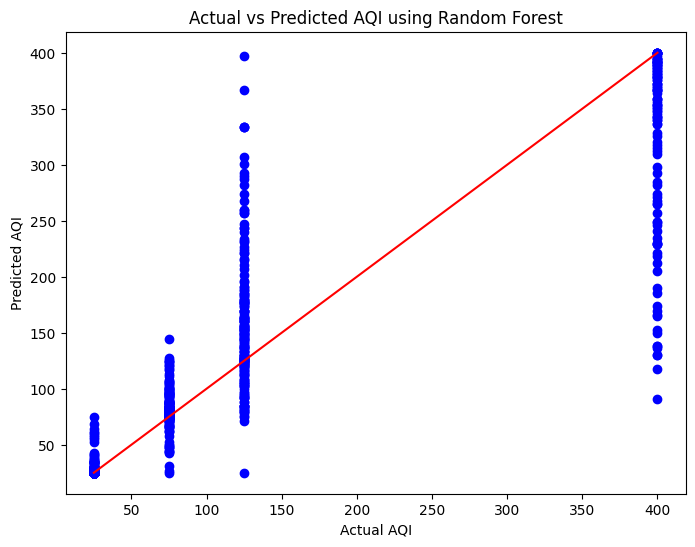

In [ ]:
##using Random Forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#  Correct file path with the updated filename
file_path = r'C:\Users\user\Desktop\dataset\updated_pollution_dataset.csv'
df = pd.read_csv(file_path)

# Previewing the data
print("Original Data Head:")
print(df.head())

# Convert AQI categories to numerical values (if necessary)
def convert_aqi_to_numerical(aqi_category):
    if aqi_category == 'Good':
        return 25  # Midpoint between 0 and 50
    elif aqi_category == 'Moderate':
        return 75  # Midpoint between 51 and 100
    elif aqi_category == 'Poor':
        return 125  # Midpoint between 101 and 150
    elif aqi_category == 'Unhealthy for Sensitive Groups':
        return 175  # Midpoint between 151 and 200
    elif aqi_category == 'Unhealthy':
        return 250  # Midpoint between 201 and 300
    elif aqi_category == 'Hazardous':
        return 400  # Midpoint between 301 and 500
    return None  # Handle any missing categories

# Apply the conversion function to the 'AQI' column
df['AQI'] = df['AQI'].apply(convert_aqi_to_numerical)

# Features and target variable
X = df[['Temperature', 'Humidity', 'CO2', 'Pm2.5', 'PM10']]  # Use these features
Y = df['AQI']  # Target variable is AQI (now numerical)

# Split the data into training and testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust `n_estimators` if needed
rf.fit(X_train_scaled, Y_train)

# Predicting on the test data
Y_pred = rf.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualizing the predictions
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI using Random Forest')
plt.show()


KNN - MSE: 3365.7000, R²: 0.7327
Random Forest - MSE: 2578.8472, R²: 0.7952
Linear Regression - MSE: 3678.7680, R²: 0.7078


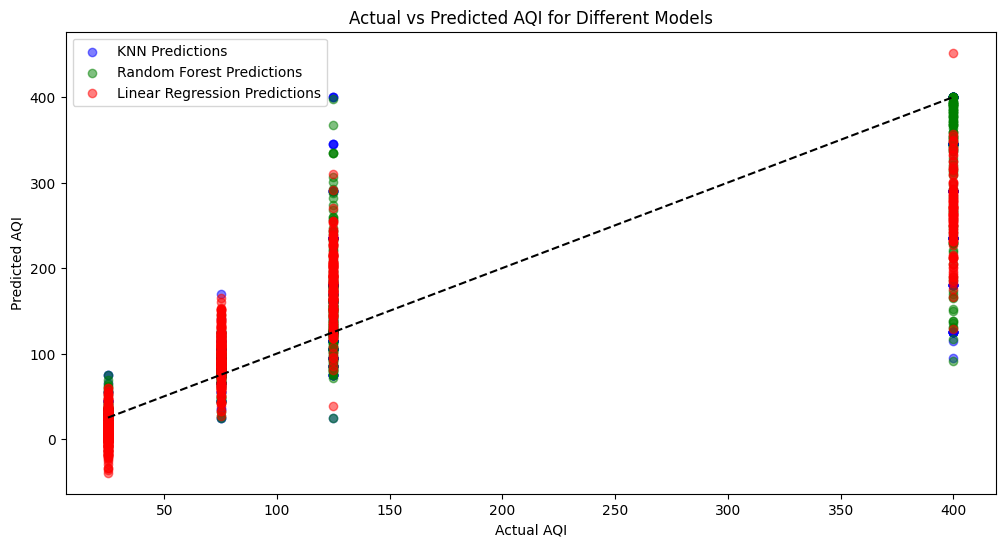

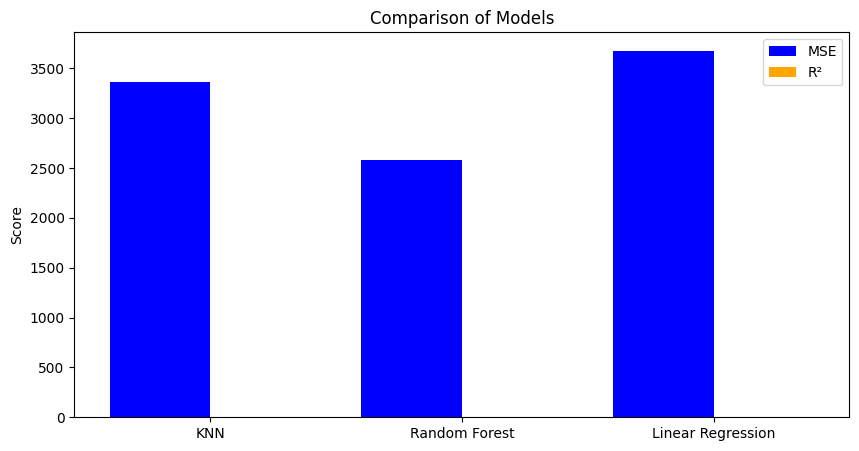

In [ ]:
##comparison betn models
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

# Now evaluate the models
knn_mse, knn_r2, knn_pred = evaluate_model(knn, X_test_scaled, Y_test, "KNN")
rf_mse, rf_r2, rf_pred = evaluate_model(rf, X_test_scaled, Y_test, "Random Forest")
lr_mse, lr_r2, lr_pred = evaluate_model(lr, X_test_scaled, Y_test, "Linear Regression")

# Plotting and comparison as before
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, knn_pred, label='KNN Predictions', alpha=0.5, color='blue')
plt.scatter(Y_test, rf_pred, label='Random Forest Predictions', alpha=0.5, color='green')
plt.scatter(Y_test, lr_pred, label='Linear Regression Predictions', alpha=0.5, color='red')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='black', linestyle='dashed')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI for Different Models")
plt.legend()
plt.show()

# Bar chart for MSE & R² comparison
metrics = ['MSE', 'R²']
values = [
    [knn_mse, knn_r2],
    [rf_mse, rf_r2],
    [lr_mse, lr_r2]
]
models = ['KNN', 'Random Forest', 'Linear Regression']

plt.figure(figsize=(10, 5))
x = np.arange(len(models))
plt.bar(x - 0.2, [v[0] for v in values], width=0.4, label="MSE", color='blue')
plt.bar(x + 0.2, [v[1] for v in values], width=0.4, label="R²", color='orange')
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Comparison of Models")
plt.legend()
plt.show()


KNN - MSE: 3365.7, R²: 0.73268193567324
Random Forest - MSE: 2578.84725, R²: 0.795177093898925
Linear Regression - MSE: 3678.7679526950546, R²: 0.7078167607862378


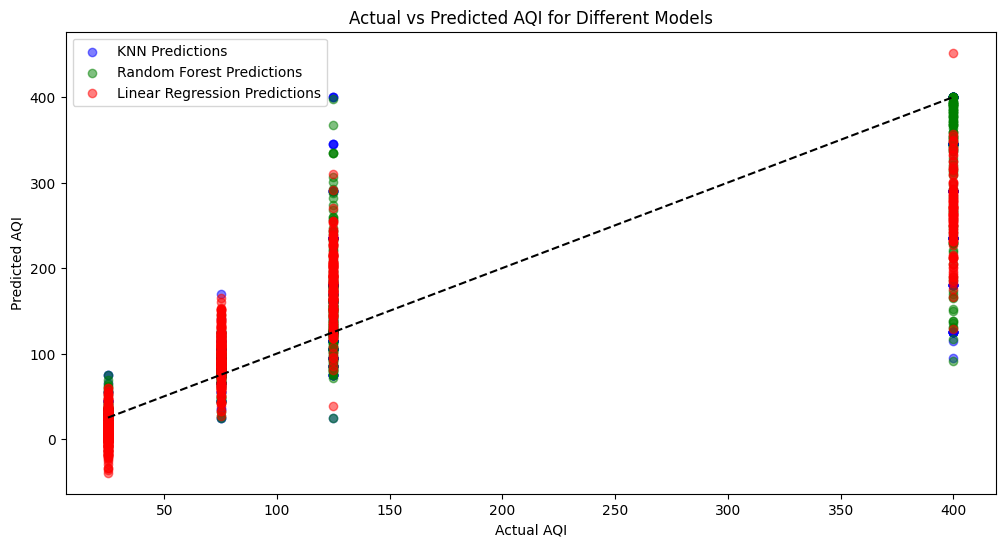

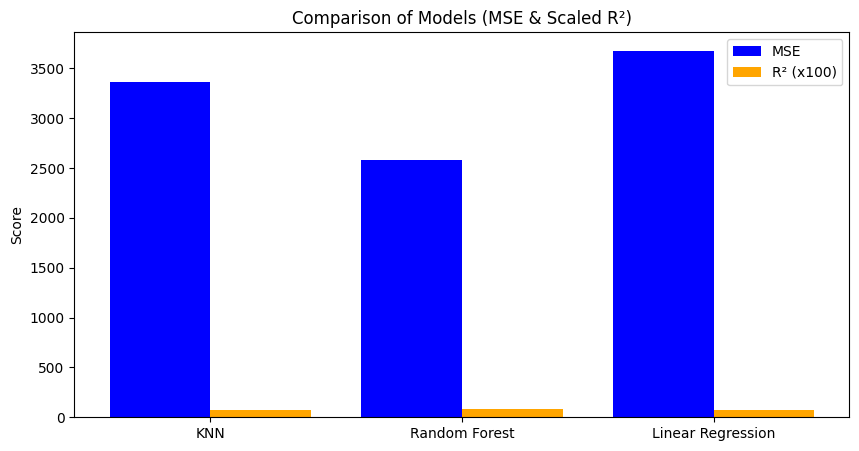

In [ ]:
## Rsuare is too small so scaling it up
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(model, X_test, Y_test, model_name):
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    print(f"{model_name} - MSE: {mse}, R²: {r2}")
    return mse, r2, Y_pred

# Train models
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

knn.fit(X_train_scaled, Y_train)
rf.fit(X_train_scaled, Y_train)
lr.fit(X_train_scaled, Y_train)

# Evaluate models
knn_mse, knn_r2, knn_pred = evaluate_model(knn, X_test_scaled, Y_test, "KNN")
rf_mse, rf_r2, rf_pred = evaluate_model(rf, X_test_scaled, Y_test, "Random Forest")
lr_mse, lr_r2, lr_pred = evaluate_model(lr, X_test_scaled, Y_test, "Linear Regression")

# Scatter plot: Actual vs Predicted AQI
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, knn_pred, label='KNN Predictions', alpha=0.5, color='blue')
plt.scatter(Y_test, rf_pred, label='Random Forest Predictions', alpha=0.5, color='green')
plt.scatter(Y_test, lr_pred, label='Linear Regression Predictions', alpha=0.5, color='red')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='black', linestyle='dashed')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI for Different Models")
plt.legend()
plt.show()

# Prepare data for bar plot
models = ['KNN', 'Random Forest', 'Linear Regression']
mse_values = [knn_mse, rf_mse, lr_mse]
r2_values = [knn_r2, rf_r2, lr_r2]

x = np.arange(len(models))

# Plot with only scaled R²
plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, mse_values, width=0.4, label="MSE", color='blue')
plt.bar(x + 0.2, [r2 * 100 for r2 in r2_values], width=0.4, label="R² (x100)", color='orange')  # Only R² is scaled
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Comparison of Models (MSE & Scaled R²)")
plt.legend()
plt.show()
